## Check a NetCDF from ERA5 

Files downloaded from CDS can be checked in julia like this:

In [4]:
# Packages needed
cd(@__DIR__)
using Pkg
Pkg.activate(".")
Pkg.add("ZarrDatasets")
using NCDatasets
using ZarrDatasets
using Dates
using Plots

  Activating project at `~/deepblack/src/DataCollector.jl.git`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
      Compat entries added for ZarrDatasets
    Updating `~/deepblack/src/DataCollector.jl.git/Project.toml`
  [519a4cdf] + ZarrDatasets v0.1.4
    Updating `~/deepblack/src/DataCollector.jl.git/Manifest.toml`
  [519a4cdf] + ZarrDatasets v0.1.4
Precompiling packages...
    958.3 ms  ✓ ZarrDatasets
  1 dependency successfully precompiled in 1 seconds. 247 already precompiled.


In [5]:
# Look at NetCDF file
# Change to your own file
filename="era5_northsea_201312/era5_wind_201312_40_-15_65_20.nc" 

ds = NCDataset(filename)

Dataset: era5_northsea_201312/era5_wind_201312_40_-15_65_20.nc
Group: /

Dimensions
   valid_time = 744
   latitude = 101
   longitude = 141

Variables
  number  
    Attributes:
     long_name            = ensemble member numerical id
     units                = 1
     standard_name        = realization

  valid_time   (744)
    Datatype:    DateTime (Int64)
    Dimensions:  valid_time
    Attributes:
     long_name            = time
     standard_name        = time
     units                = seconds since 1970-01-01
     calendar             = proleptic_gregorian

  latitude   (101)
    Datatype:    Union{Missing, Float64} (Float64)
    Dimensions:  latitude
    Attributes:
     _FillValue           = NaN
     units                = degrees_north
     standard_name        = latitude
     long_name            = latitude
     stored_direction     = decreasing

  longitude   (141)
    Datatype:    Union{Missing, Float64} (Float64)
    Dimensions:  longitude
    Attributes:
     _FillVa

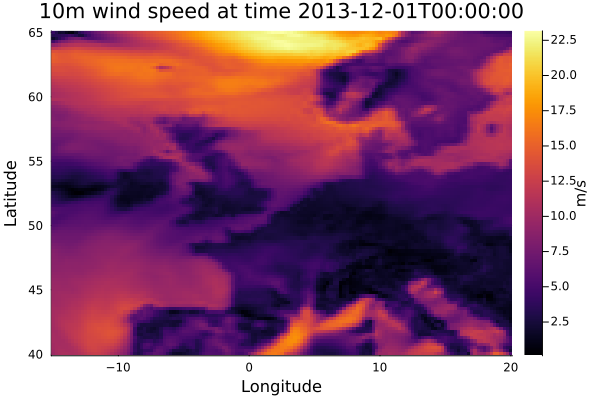

In [7]:
# select some data and plot
times=ds["valid_time"][:]
lon=ds["longitude"][:]
lat=ds["latitude"][:]
lat=lat[end:-1:1] # reverse latitude for plotting
itime=1 # select a time index
u10=ds["u10"][:,end:-1:1,itime] # reverse latitude for plotting
v10=ds["v10"][:,end:-1:1,itime] # reverse latitude for plotting
u_magnitude=sqrt.(u10.^2 .+ v10.^2)
heatmap(lon,lat,u_magnitude',xlabel="Longitude",ylabel="Latitude",title="10m wind speed at time $(times[itime])",colorbar_title="m/s")

## Open Zarr dataset

In [9]:
# Open Zarr dataset
zarr_name="era5_northsea_201312.zarr"
zds = ZarrDataset(zarr_name)

Dataset: 
Group: root

Dimensions
   y = 101
   longitude = 141
   latitude = 101
   valid_time = 744
   x = 141

Variables
  latitude   (101)
    Datatype:    Float64 (Float64)
    Dimensions:  y
    Attributes:
     units                = degrees_north
     stored_direction     = decreasing
     long_name            = latitude
     standard_name        = latitude
     _FillValue           = nothing

  10m_v_component_of_wind   (141 × 101 × 744)
    Datatype:    Float64 (Int16)
    Dimensions:  longitude × latitude × valid_time
    Attributes:
     GRIB_units           = m s**-1
     long_name            = 10 metre V wind component
     GRIB_dataType        = an
     GRIB_jScansPositively = 0
     GRIB_totalNumber     = 0
     GRIB_name            = 10 metre V wind component
     GRIB_gridType        = regular_ll
     scale_factor         = 0.01
     GRIB_Ny              = 101
     GRIB_longitudeOfLastGridPointInDegrees = 20.0
     add_offset           = 0.0
     GRIB_stepUnits       

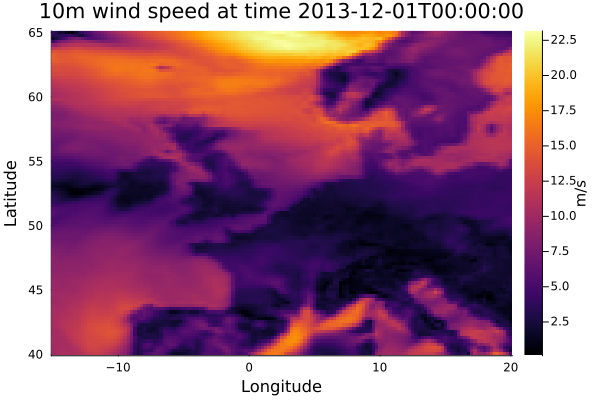

In [11]:
# Select some data and plot
times=zds["valid_time"][:]
lon=zds["longitude"][:]
lat=zds["latitude"][:] # No need to reverse latitude for plotting in Zarr
itime=1 # select a time index
u10=zds["10m_u_component_of_wind"][:, :, itime]
v10=zds["10m_v_component_of_wind"][:, :, itime]
u_magnitude=sqrt.(u10.^2 .+ v10.^2)
heatmap(lon,lat,u_magnitude',xlabel="Longitude",ylabel="Latitude",title="10m wind speed at time $(times[itime])",colorbar_title="m/s")